# Python Assignment

|Name|ANR|
|----|-------|
|Arjan Spaans|181637|

## Introduction
This notebook seeks to explore if the inflation and unemployment rates in the USA do historically depend on the whether there is a Democratic or a Republican President. By using monthly data from the [US Bureau of Labor Statistics](https://www.bls.gov/) from 1958 to 2017, I will try to find a relationship between these two indicators and a binary variable representing Republican presidency. 

According to [commonly believed theories](http://wiki.c2.com/?InflationUnderDemocratsAndRepublicans), Republicans are more inflation-averse than Democrats. However, unemployment is in an opposite way associated with these two policital orientations: Democrats are more unemployment-averse than Republicans. These arguments originate from Paul Krugman's book [Peddling Prosperity](https://www.amazon.com/exec/obidos/ISBN=0393312925/portlandpatternrA/) and backed by using data from 1945 to 1975. This would imply that there is a negative relationship between inflation and Republican Presidents, and a positive relationship between unemployment and Republican Presidents. The main channels are likely to be tax pressure and government spending. It is import to realize that the results should be interpreted very carefully, as there are much more factores related to the level of both the inflation rate and the unemployment rate. Examples are oil prices, regular economic cycles and FED-policies. All these factors are not (or extremely slightly) influenced by the US President. However, despite that, or maybe even because of that, finding a correlation would be fascinating and may be of interest while predicting inflation and unemployment rates for the future. 

Additionally, it may be likely that effects of a certain President and his policies are visible at inflation and unemployment rates after a time lag. For that reason, I also analyse the effect of having a Republican President on inflation and unemployment rates that are observed 12 months later. In this report, this time lag does not change the findings of the initial contemporaneous regressions, which yield positive relationships between a Republican President and both economic indicators.

At first, I will import the libraries that are required for the analysis:

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from datetime import datetime
import statsmodels.formula.api as sm
%matplotlib inline
matplotlib.rc('figure', figsize=(20, 10))

Next, I will import the data with Pandas:

In [2]:
df = pd.read_csv (r'C:\Users\arjan\Anaconda3\USA_Final_Monthly_Data.csv')

## Data Preparation
This is a list of the data types within this dataset

In [3]:
df.dtypes

Date                     object
Inflation               float64
Unemployment            float64
Inf_y                   float64
Unemp_y                 float64
Republican_president      int64
dtype: object

And to see what the dataframe actually looks like:

In [4]:
df

,Date,Inflation,Unemployment,Inf_y,Unemp_y,Republican_president
0,1958-01-01,3.2,5.8,1.7,6.0,1
1,1958-02-01,3.2,6.4,1.7,5.9,1
2,1958-03-01,2.8,6.7,1.7,5.6,1
3,1958-04-01,2.4,7.4,1.7,5.2,1
4,1958-05-01,2.4,7.4,2.0,5.1,1
5,1958-06-01,2.1,7.3,2.0,5.0,1
6,1958-07-01,2.4,7.5,2.0,5.1,1
7,1958-08-01,2.1,7.4,2.0,5.2,1
8,1958-09-01,1.7,7.1,2.4,5.5,1
9,1958-10-01,1.7,6.7,2.7,5.7,1


Where "Infl+12" is the inflation rate 12 months later, and "Unemp+12" is the unemployment rate 12 months later. "Republican_president" is a binary variable equal to 1 if there has been a president belonging to the Republican Party at that given moment. The next table shows how many observations there are, sorted by the type of President. 

In [5]:
df.groupby('Republican_president').count()

,Date,Inflation,Unemployment,Inf_y,Unemp_y
Republican_president,,,,,
0,337,337,337,337,337
1,383,383,383,371,371


It seems like there are plenty of observations of both President types. In order to make sure that the following graphs will be plotted in a decent way, I need to tell Pandas how to interpret the time variable 'Date' from this dataset:

In [6]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
data = pd.read_csv(r'C:\Users\arjan\Anaconda3\USA_Final_Monthly_Data.csv', parse_dates=['Date'], index_col=['Date'],date_parser=dateparse)
print(data)

            Inflation  Unemployment  Inf_y  Unemp_y  Republican_president
Date                                                                     
1958-01-01        3.2           5.8    1.7      6.0                     1
1958-02-01        3.2           6.4    1.7      5.9                     1
1958-03-01        2.8           6.7    1.7      5.6                     1
1958-04-01        2.4           7.4    1.7      5.2                     1
1958-05-01        2.4           7.4    2.0      5.1                     1
1958-06-01        2.1           7.3    2.0      5.0                     1
1958-07-01        2.4           7.5    2.0      5.1                     1
1958-08-01        2.1           7.4    2.0      5.2                     1
1958-09-01        1.7           7.1    2.4      5.5                     1
1958-10-01        1.7           6.7    2.7      5.7                     1
1958-11-01        1.7           6.2    2.0      5.8                     1
1958-12-01        1.7           6.2   

## Graphs of the data
Next, I will plot a graph on the development of the inflation rate, and a graph on the development on the unemployment rate. The parts of the graphs with a blue background indicate that there was a democratic president, and a red background indicates a Republican president

<function matplotlib.pyplot.show>

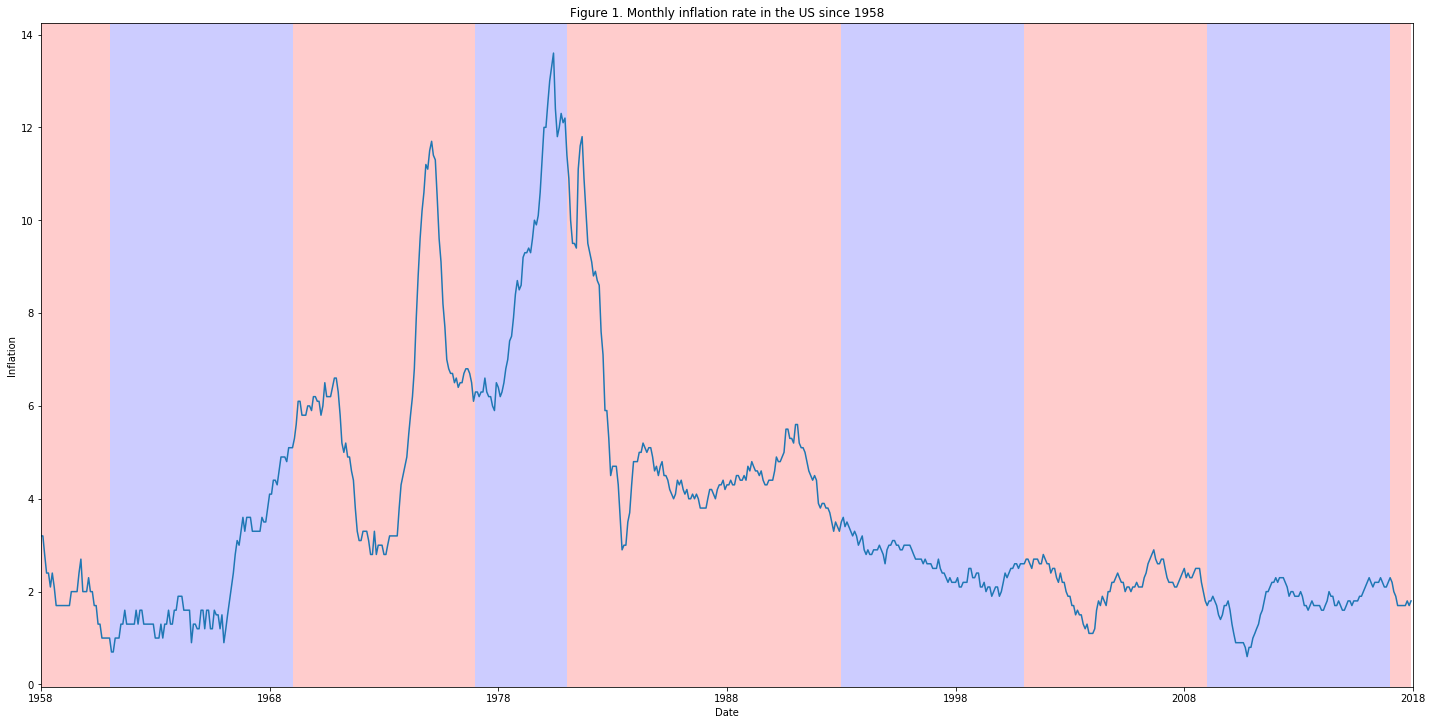

In [7]:
inf = data['Inflation']
plt.plot(inf)
plt.xlabel ('Date')
plt.xlim('1958-01-01', '2018')
plt.ylabel ('Inflation')
plt.tight_layout()
plt.title ('Figure 1. Monthly inflation rate in the US since 1958')
plt.axvspan('1958-01-01', '1961-01-01', facecolor='r', alpha=0.2)
plt.axvspan('1961-01-01', '1969-01-01', facecolor='b', alpha=0.2)
plt.axvspan('1969-01-01', '1977-01-01', facecolor='r', alpha=0.2)
plt.axvspan('1977-01-01', '1981-01-01', facecolor='b', alpha=0.2)
plt.axvspan('1981-01-01', '1993-01-01', facecolor='r', alpha=0.2)
plt.axvspan('1993-01-01', '2001-01-01', facecolor='b', alpha=0.2)
plt.axvspan('2001-01-01', '2009-01-01', facecolor='r', alpha=0.2)
plt.axvspan('2009-01-01', '2017-01-01', facecolor='b', alpha=0.2)
plt.axvspan('2017-01-01', '2017-12-01', facecolor='r', alpha=0.2)
plt.show

There are two huge spikes in the data during the 70's. This is likely to be caused by the oil crises in 1973 and 1979. However the first oil crisis occured under Republican presidency (Nixon & Ford), while the second oil crisis occured with the democratic president Carter. Hopefully this will even out and balance the distribution of the observations. 

<function matplotlib.pyplot.show>

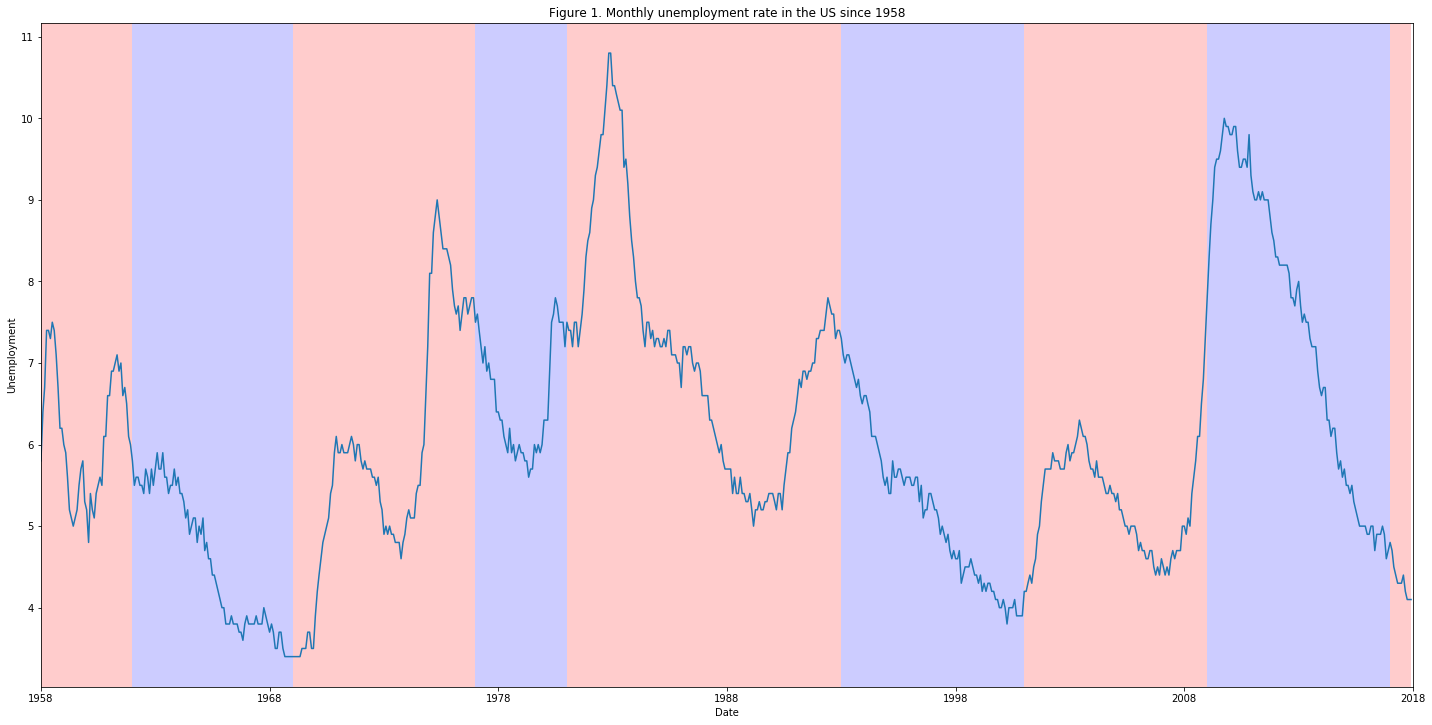

In [8]:
unemp = data['Unemployment']
plt.plot(unemp)
plt.xlim('1958-01-01', '2018')
plt.xlabel ('Date')
plt.ylabel ('Unemployment')
plt.tight_layout()
plt.title ('Figure 1. Monthly unemployment rate in the US since 1958')
plt.axvspan('1958-01-01', '1962-01-01', facecolor='r', alpha=0.2)
plt.axvspan('1962-01-01', '1969-01-01', facecolor='b', alpha=0.2)
plt.axvspan('1969-01-01', '1977-01-01', facecolor='r', alpha=0.2)
plt.axvspan('1977-01-01', '1981-01-01', facecolor='b', alpha=0.2)
plt.axvspan('1981-01-01', '1993-01-01', facecolor='r', alpha=0.2)
plt.axvspan('1993-01-01', '2001-01-01', facecolor='b', alpha=0.2)
plt.axvspan('2001-01-01', '2009-01-01', facecolor='r', alpha=0.2)
plt.axvspan('2009-01-01', '2017-01-01', facecolor='b', alpha=0.2)
plt.axvspan('2017-01-01', '2017-12-01', facecolor='r', alpha=0.2)
plt.show

This graph seems to indicate a trend: unemployment rises under Republican presidency, and falls under Democratic presidency. Whether the absolute values of unemployment rates show a similar relationship will be explored in the next part, the analysis. 

## Analysis
Next, I will plot the two OLS regressions of inflation and unemployment as dependent variables, with the Republican president indicator as independent variable.

In [9]:
result = sm.ols(formula="Inflation ~ Republican_president", data=df).fit()
print(result.params)
print(result.summary())

Intercept               3.135015
Republican_president    1.073601
dtype: float64
                            OLS Regression Results                            
Dep. Variable:              Inflation   R-squared:                       0.044
Model:                            OLS   Adj. R-squared:                  0.042
Method:                 Least Squares   F-statistic:                     32.77
Date:                Mon, 29 Jan 2018   Prob (F-statistic):           1.53e-08
Time:                        14:41:14   Log-Likelihood:                -1683.6
No. Observations:                 720   AIC:                             3371.
Df Residuals:                     718   BIC:                             3380.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

Wow, such a strong relationship! A Republican President is associated with an 1.07 percentage points higher inflation rate. Let's have a look at the unemployment rate:

In [10]:
result2 = sm.ols(formula="Unemployment ~ Republican_president", data=df).fit()
print(result2.params)
print(result2.summary())

Intercept               5.934125
Republican_president    0.207129
dtype: float64
                            OLS Regression Results                            
Dep. Variable:           Unemployment   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     3.152
Date:                Mon, 29 Jan 2018   Prob (F-statistic):             0.0763
Time:                        14:41:14   Log-Likelihood:                -1341.8
No. Observations:                 720   AIC:                             2688.
Df Residuals:                     718   BIC:                             2697.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

There also is a positive relationship between Republican presidency and the unemployment rate, even though it lacks some significance ($\beta$=0.21, $\rho$=0.076). Next, let's have a look at the lagged variable OLS regressions:

In [11]:
result3 = sm.ols(formula="Inf_y ~ Republican_president", data=df).fit()
print(result3.params)
print(result3.summary())

Intercept               3.435608
Republican_president    0.562235
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                  Inf_y   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     8.475
Date:                Mon, 29 Jan 2018   Prob (F-statistic):            0.00371
Time:                        14:41:14   Log-Likelihood:                -1670.9
No. Observations:                 708   AIC:                             3346.
Df Residuals:                     706   BIC:                             3355.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

Not surprisingly, the relationship remains positive and significant. The inflation rate tends to 0.56 percentage points higher if there was a Republican President 12 months earlier ($\beta$=0.56, $\rho$=0.004).

In [12]:
result4 = sm.ols(formula="Unemp_y ~ Republican_president", data=df).fit()
print(result4.params)
print(result4.summary())

Intercept               5.585757
Republican_president    0.849284
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                Unemp_y   R-squared:                       0.073
Model:                            OLS   Adj. R-squared:                  0.072
Method:                 Least Squares   F-statistic:                     55.48
Date:                Mon, 29 Jan 2018   Prob (F-statistic):           2.76e-13
Time:                        14:41:14   Log-Likelihood:                -1297.8
No. Observations:                 708   AIC:                             2600.
Df Residuals:                     706   BIC:                             2609.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

In this lagged OLS regression, the relationship between Republican presidency and the unemployment rate 12 months later increases in magnitude and significance ($\beta$ = 0.85, $\rho$ =0.000). 

## Conclusion
In this Notebook I found a positive correlation of an indicator representing Republican presidency and inflation rates. According to the OLS results, a Republican president is historically associated a 1.07 percentage points higher inflation rate at a given moment ($\beta$=1.07, $\rho$=0.000). When I use a lagged variable (the inflation rate 12 months later), the relationship remains significant, but decreases to 0.56 percentage points ($\beta$=0.56, $\rho$=0.004).

Regarding unemployment, the contemporaneous OLS regression yields a positive relationship between Republican presidency and the unemployment rate. However, this relationship is not significant at the 0.05 significance level ($\beta$=0.21, $\rho$=0.076). When using a lagged variable (the unemployment rate 12 months later), the relationship increases in both magnitude and statistical significance ($\beta$ = 0.85, $\rho$ =0.000)

I am not claiming any proven causality here. Given the fact that the R-squared levels are very low, it is obvious that there are indeed many other factors that influence both inflation rates and unemployment rates. An important example is the oil price, which can largely be held responsible for the huge spikes in both inflation and unemployment rates in the 70's and the 80's. How these spikes exactly influence the results is uncertain. Additionally, serial correlation of both parameters may bias the results as well. Future analysis might focus on the percentage change in inflation rate instead of the absolute values, in order to (partly) correct for such outliers. Additionally, other covariates like oil prices and budget deficits should be included. 

However, the correlations are surprisingly strong and they are based upon a large number of observations. I am very curious to learn how these economic indicators will develop in the upcoming years under the presidency of Donald Trump, despite the fact that according to a [very reliable source](https://twitter.com/realDonaldTrump/status/957603804383465472), unemployment rates in the US are currently almost record low.   